<a href="https://colab.research.google.com/github/goldsnafu/BakodAI-Deep-Learning-model/blob/main/BakodAI_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.1MB/s 
     |████████████████████████████████| 194kB 21.8MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 1.0MB 18.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 40kB 5.8MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 2.6MB 44.8MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
zipped_path= Path('/content/gdrive/My Drive/fastai-2019/data/planet')

In [ ]:
zipped_path.ls()

In [ ]:
path = Path('/content/gdrive/My Drive/NASA-SpaceApps')

## Unzipping Files

In [ ]:
!unzip "/content/gdrive/My Drive/fastai-2019/data/planet/train_v2.csv.zip" -d "/content/gdrive/My Drive/NASA-SpaceApps"

Archive:  /content/gdrive/My Drive/fastai-2019/data/planet/train_v2.csv.zip
  inflating: /content/gdrive/My Drive/NASA-SpaceApps/train_v2.csv  
   creating: /content/gdrive/My Drive/NASA-SpaceApps/__MACOSX/
  inflating: /content/gdrive/My Drive/NASA-SpaceApps/__MACOSX/._train_v2.csv  


In [ ]:
! sudo apt install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [ ]:
!p7zip -d '/content/gdrive/My Drive/fastai-2019/data/planet/train-jpg.tar.7z'


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/gdrive/My Drive/fastai-2019/data/planet/                                                           1 file, 629296207 bytes (601 MiB)

Extracting archive: /content/gdrive/My Drive/fastai-2019/data/planet/train-jpg.tar.7z
--
Path = /content/gdrive/My Drive/fastai-2019/data/planet/train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

  0%      0% - train-jpg.tar                      1% - train-jpg.tar                      2% - train-jpg.tar                    

In [ ]:
%cp /content/train-jpg.tar '/content/gdrive/My Drive/NASA-SpaceApps'

In [ ]:
!tar -xf '/content/gdrive/My Drive/NASA-SpaceApps/train-jpg.tar'

In [ ]:
%cp -av /content/train-jpg '/content/gdrive/My Drive/NASA-SpaceApps'

# Data 

In [ ]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40479 entries, 0 to 40478
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_name  40479 non-null  object
 1   tags        40479 non-null  object
dtypes: object(2)
memory usage: 632.6+ KB


In [ ]:
df['image_name'] = df['image_name'] + '.jpg'

In [ ]:
df.head()

,image_name,tags
0,train_0.jpg,haze primary
1,train_1.jpg,agriculture clear primary water
2,train_2.jpg,clear primary
3,train_3.jpg,clear primary
4,train_4.jpg,agriculture clear habitation primary road


In [ ]:
df.iloc[:,0]

0            train_0.jpg
1            train_1.jpg
2            train_2.jpg
3            train_3.jpg
4            train_4.jpg
              ...       
40474    train_40474.jpg
40475    train_40475.jpg
40476    train_40476.jpg
40477    train_40477.jpg
40478    train_40478.jpg
Name: image_name, Length: 40479, dtype: object

#DataBlock Setup

##Datasets Check

In [ ]:
dblock = DataBlock()

In [ ]:
dsets = dblock.datasets(df)

In [ ]:
len(dsets.train),len(dsets.valid)

(32384, 8095)

In [ ]:
x,y = dsets.train[0]
x,y

(image_name                            train_1398.jpg
 tags          agriculture partly_cloudy primary road
 Name: 1398, dtype: object,
 image_name                            train_1398.jpg
 tags          agriculture partly_cloudy primary road
 Name: 1398, dtype: object)

In [ ]:
x['image_name']

'train_20862.jpg'

In [ ]:
dblock = DataBlock(get_x = lambda r: r['image_name'], get_y = lambda r: r['tags'])
dsets = dblock.datasets(df)
dsets.train[0]

('train_1398.jpg', 'agriculture partly_cloudy primary road')

In [ ]:
def get_x(r): return r['image_name']
def get_y(r): return r['tags']
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('train_14129.jpg', 'agriculture cultivation partly_cloudy primary')

In [ ]:
def get_x(r): return path/'train-jpg'/r['image_name']
def get_y(r): return r['tags'].split(' ')
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('/content/gdrive/My Drive/NASA-SpaceApps/train-jpg/train_4791.jpg'),
 ['agriculture', 'clear', 'cultivation', 'primary'])

In [ ]:
# dblock = DataBlock(get_x = get_x, get_y = get_y)
# dsets = dblock.datasets(df)
# dsets.train[5]

(Path('/content/gdrive/My Drive/NASA-SpaceApps/train-jpg/train_22777.jpg'),
 ['agriculture', 'clear', 'primary', 'road', 'water'])

In [ ]:
def get_x(r): return path/'train-jpg'/r['image_name']
def get_y(r): return r['tags'].split(' ')

In [ ]:
# dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
#                    get_x = get_x, get_y = get_y)
# dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=256x256,
 TensorMultiCategory([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.]))

(PILImage mode=RGB size=256x256,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]))

## Checking Categories Representation

In [ ]:
# Checking Categories Representation using Indexes
idxs = torch.where(dsets.train[0][1]==1.)[0]
dsets.train.vocab[idxs]

(#4) ['agriculture','cultivation','partly_cloudy','primary']

In [ ]:
print(dsets.vocab), print(dsets.vocab[:10]), print(dsets.vocab[10:])

(#17) ['agriculture','artisinal_mine','bare_ground','blooming','blow_down','clear','cloudy','conventional_mine','cultivation','habitation'...]
(#10) ['agriculture','artisinal_mine','bare_ground','blooming','blow_down','clear','cloudy','conventional_mine','cultivation','habitation']
(#7) ['haze','partly_cloudy','primary','road','selective_logging','slash_burn','water']


(None, None, None)

##DataBlock

In [ ]:
planet = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=get_x, 
                   get_y=get_y)

In [ ]:
# Resizing and Augmentation
planet = planet.new(item_tfms=RandomResizedCrop(128, min_scale=0.3),
                    batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))

In [ ]:
dls.loss_func

FlattenedLoss of BCEWithLogitsLoss()

In [ ]:
dls = planet.dataloaders(df)

In [ ]:
# Double checking the Categories
print(dls.vocab)

(#17) ['agriculture','artisinal_mine','bare_ground','blooming','blow_down','clear','cloudy','conventional_mine','cultivation','habitation'...]


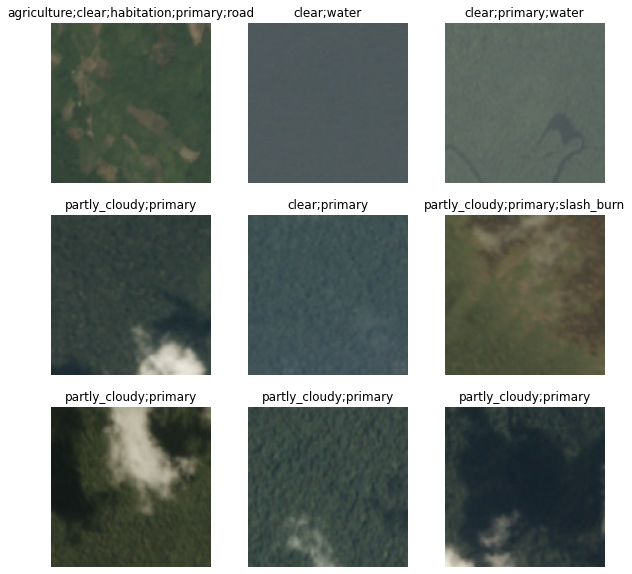

In [ ]:
dls.show_batch(figsize=(10,10))

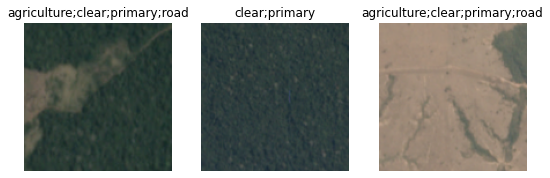

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
dls.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
planet.summary(path/"train-jpg")


#Learner

##Resnet18

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
learn.summary()

Sequential (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 64 x 64    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 64 x 64 x 64 x 64    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 32 x 32    0          False     
________________________________________________________________
Conv2d               64 x 64 x 32 x 32    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 32 x 32    128        True      
________________________________________________________________
ReLU                 64 x 64 x 32 x 32    0          False     
_________________________________________________

In [ ]:
#Fine Tuning
learn.fine_tune(3, base_lr=3e-3, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.365129,0.192023,0.903056,1:51:03
1,0.161720,0.134886,0.935029,02:57
2,0.146940,0.122014,0.934760,02:56
3,0.138379,0.118009,0.937180,02:53


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.124874,0.106997,0.948806,02:53
1,0.120014,0.099763,0.949090,02:51
2,0.113462,0.097198,0.952818,02:49


Unfreezing and Discriminative Learning Rates

In [ ]:
# learn = cnn_learner(dls, resnet18, metrics=partial(accuracy_multi, thresh=0.2))
# learn.fit_one_cycle(3, 3e-3)
# learn.unfreeze()
# learn.fit_one_cycle(8, lr_max=slice(1e-6,1e-4))

## Exporting and Saving



Loading trained model

In [ ]:
# learn.load(path/'resnet-18') #Done on Oct 3
# learn.load(path/'resnet-18_Oct3') #Done on Oct 4

Checking layers of the loaded model

In [ ]:
learn.model #Done on Oct 3

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.model #Done on Oct 4

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Exporting for Deployment with PyTorch

In [ ]:
# THIS will save the weights/parameters into a dictionary
#WILL NOT include the architecture and its layers
torch.save({'state_dict': learn.model.state_dict()}, path/'fastai-rn18.pth')

Checking tensors 


In [ ]:
x,y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape

torch.Size([64, 17])

In [ ]:
activs[0]

tensor([  5.3434, -11.1582,  -6.6766,  -9.8831, -10.4052,   0.8044, -11.9247, -11.2154,  -1.9617,  -1.8959,  -4.4489,  -0.2464,   4.8326,  -0.3017,  -9.7363,  -6.0342,  -3.2306],
       grad_fn=<SelectBackward>)

Saving for later training (using Fastai)


In [ ]:
learn.save('resnet-18')

Path('models/resnet-18.pth')

For Inference or Deployment (using Fastai)

In [ ]:
#Will be saved as PKL file
learn.export()

In [ ]:
#Verifying saved pkl file
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
%cp /content/models/resnet-18.pth '/content/gdrive/My Drive/NASA-SpaceApps'

In [ ]:
%cp /content/export.pkl '/content/gdrive/My Drive/NASA-SpaceApps'

In [ ]:
# Resnet50 
# learn50 = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))

#Testing the Model

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
doc(load_learner)

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/NASA-SpaceApps/train-jpg/train_40471.jpg')

((#2) ['clear','primary'],
 tensor([False, False, False, False, False,  True, False, False, False, False, False, False,  True, False, False, False, False]),
 tensor([4.3043e-03, 1.0219e-06, 8.6116e-05, 1.1874e-02, 1.6902e-04, 9.9472e-01, 2.0643e-05, 9.2108e-08, 2.8530e-03, 1.0138e-03, 7.6200e-05, 4.2742e-03, 9.9990e-01, 4.1644e-03, 9.6795e-04, 2.8133e-05,
         5.1343e-03]))

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/NASA-SpaceApps/train-jpg/train_40471.jpg')

((#2) ['clear','primary'],
 tensor([False, False, False, False, False,  True, False, False, False, False, False, False,  True, False, False, False, False]),
 tensor([5.7764e-03, 4.0977e-07, 1.7645e-04, 5.8077e-03, 7.4231e-04, 9.9451e-01, 3.9737e-05, 1.7802e-07, 1.9804e-03, 9.1926e-04, 7.7593e-05, 3.3776e-03, 9.9983e-01, 4.0351e-03, 1.0084e-03, 1.1028e-05,
         6.0848e-03]))

In [ ]:
#2nd Run Test
learn_inf.predict('/content/gdrive/My Drive/NASA-SpaceApps/train-jpg/train_40471.jpg')

((#2) ['clear','primary'],
 tensor([False, False, False, False, False,  True, False, False, False, False, False, False,  True, False, False, False, False]),
 tensor([4.3043e-03, 1.0219e-06, 8.6116e-05, 1.1874e-02, 1.6902e-04, 9.9472e-01, 2.0643e-05, 9.2108e-08, 2.8530e-03, 1.0138e-03, 7.6200e-05, 4.2742e-03, 9.9990e-01, 4.1644e-03, 9.6795e-04, 2.8133e-05,
         5.1344e-03]))

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/NASA-SpaceApps/train-jpg/train_39998.jpg')

((#3) ['agriculture','partly_cloudy','primary'],
 tensor([ True, False, False, False, False, False, False, False, False, False, False,  True,  True, False, False, False, False]),
 tensor([9.6154e-01, 3.8172e-05, 8.3482e-03, 3.8934e-05, 2.1857e-04, 7.5912e-02, 1.3645e-05, 1.5798e-05, 2.3839e-01, 7.5401e-02, 1.6964e-03, 9.2483e-01, 9.9934e-01, 1.3178e-01, 2.4530e-04, 5.7881e-03,
         8.6113e-02]))

In [ ]:
#2nd Run Test
learn_inf.predict('/content/gdrive/My Drive/NASA-SpaceApps/train-jpg/train_39998.jpg')

((#3) ['agriculture','partly_cloudy','primary'],
 tensor([ True, False, False, False, False, False, False, False, False, False, False,  True,  True, False, False, False, False]),
 tensor([9.6540e-01, 6.4094e-05, 6.9980e-03, 8.7224e-05, 2.8640e-04, 1.1648e-01, 2.2799e-05, 3.7013e-05, 3.1818e-01, 1.0228e-01, 1.2796e-03, 8.9734e-01, 9.9952e-01, 2.1164e-01, 3.2319e-04, 6.1032e-03,
         5.7330e-02]))

In [ ]:
learn_inf.dls.vocab

(#17) ['agriculture','artisinal_mine','bare_ground','blooming','blow_down','clear','cloudy','conventional_mine','cultivation','habitation'...]

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/NASA-SpaceApps/test img.jpg')

((#4) ['agriculture','partly_cloudy','primary','road'],
 tensor([ True, False, False, False, False, False, False, False, False, False, False,  True,  True,  True, False, False, False]),
 tensor([6.2978e-01, 9.3026e-03, 9.8643e-02, 4.6368e-04, 8.2501e-04, 1.3172e-02, 7.3550e-04, 5.8898e-03, 8.2644e-02, 1.1062e-01, 1.6146e-03, 9.8874e-01, 9.8877e-01, 7.9368e-01, 7.5391e-03, 2.6652e-03,
         3.5285e-01]))

In [ ]:
learn_inf.predict('/content/gdrive/My Drive/NASA-SpaceApps/test img2.jpg')

((#5) ['clear','habitation','primary','road','water'],
 tensor([False, False, False, False, False,  True, False, False, False,  True, False, False,  True,  True, False, False,  True]),
 tensor([3.2482e-01, 1.2982e-03, 2.8915e-02, 3.6389e-04, 2.2849e-05, 9.9075e-01, 1.4550e-04, 3.1718e-03, 8.8649e-02, 9.8908e-01, 6.6568e-03, 2.7280e-03, 9.7591e-01, 8.8961e-01, 1.2771e-03, 1.3501e-03,
         8.3626e-01]))

In [ ]:
# torch.save(learn_inf,'/content/gdrive/My Drive/NASA-SpaceApps/test')